## Description

Produce a plot showing what fraction of the genome is covered at different depths.

In [10]:
import ag3

In [12]:
v3 = ag3.release_data()

In [13]:
import numba
import numpy as np
import dask.array as da

In [14]:
import allel
import pandas as pd

In [15]:
from dask_kubernetes import KubeCluster
from dask.distributed import Client, progress
import dask

In [16]:
dask_me = "kubernetes"

In [17]:
if dask_me == "kubernetes":
    # kubernetes cluster setup

    n_workers = 5
    cluster = KubeCluster()
    cluster.scale_up(n_workers)
    #cluster.adapt(minimum=1, maximum=n_workers)
    cluster

    # dask client setup

    client = Client(cluster)
    
    
elif dask_me == "single":
    dask.config.set(scheduler='threads')
    client = None
else:
    client = Client()
    
client

distributed.scheduler - INFO - Clear task state
/opt/conda/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)
distributed.scheduler - INFO -   Scheduler at:   tcp://10.32.38.21:37079
distributed.scheduler - INFO -   dashboard at:                    :41321
distributed.scheduler - INFO - Receive client connection: Client-015861ba-eec9-11ea-877d-3a25ea0b91c3
distributed.core - INFO - Starting established connection


<Client: 'tcp://10.32.38.21:37079' processes=0 threads=0, memory=0 B>

In [20]:
sample_sets = v3.all_wild_sample_sets

In [22]:
all_meta = v3.load_sample_set_metadata(sample_sets)

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [23]:
chromosomes = "2L", "2R", "3L", "3R", "X"

In [24]:
males_select = all_meta.sex_call == "M"

select = (all_meta.species_gambcolu_arabiensis == "gamb_colu") & males_select

In [26]:
gt = v3.load_sample_set_calldata("X", sample_sets, field="GT")
gt = allel.GenotypeDaskArray(gt)
gt

distributed.scheduler - INFO - Register tcp://10.33.142.2:46277
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.33.142.2:46277
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.33.160.2:43621
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.33.160.2:43621
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.33.157.2:40065
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.33.157.2:40065
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.33.180.2:40355
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.33.180.2:40355
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.33.183.2:44839
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.33.183.2:44839
distributed.c

<GenotypeDaskArray shape=(23385349, 2784, 2) dtype=int8>

In [33]:
gq = v3.load_sample_set_calldata("X", sample_sets, field="GQ")
gq

dask.array<concatenate, shape=(23385349, 2784), dtype=int16, chunksize=(300000, 50), chunktype=numpy.ndarray>

In [27]:
gt_sel = gt.compress(select.values, axis=1)
gt_sel

<GenotypeDaskArray shape=(23385349, 220, 2) dtype=int8>

In [36]:
gq_sel = da.compress(select.values, gq, axis=1)
gq_sel

dask.array<getitem, shape=(23385349, 220), dtype=int16, chunksize=(300000, 25), chunktype=numpy.ndarray>

In [37]:
gt_sel.shape

(23385349, 220, 2)

In [38]:
pd.crosstab(all_meta.sample_set, all_meta.sex_call)

sex_call        F   M  UKN
sample_set                
AG1000G-AO     77   4    0
AG1000G-BF-A  151  30    0
AG1000G-BF-B   74  28    0
AG1000G-BF-C   13   0    0
AG1000G-CD     44  32    0
AG1000G-CF     73   0    0
AG1000G-CI     80   0    0
AG1000G-CM-A  258  45    0
AG1000G-CM-B   97   0    0
AG1000G-CM-C   44   0    0
AG1000G-FR     11  12    0
AG1000G-GA-A   69   0    0
AG1000G-GH    100   0    0
AG1000G-GM-A   74   0    0
AG1000G-GM-B    2   0   29
AG1000G-GM-C  174   0    0
AG1000G-GN-A   45   0    0
AG1000G-GN-B  144  41    0
AG1000G-GQ     10   0    0
AG1000G-GW    101   0    0
AG1000G-KE     75  11    0
AG1000G-ML-A   51   9    0
AG1000G-ML-B   71   0    0
AG1000G-MW     41   0    0
AG1000G-MZ     74   0    0
AG1000G-TZ    289  11    0
AG1000G-UG    290   0    0

In [44]:
het = gt_sel.is_het() & (gq_sel >= 30)
het

dask.array<and_, shape=(23385349, 220), dtype=bool, chunksize=(300000, 25), chunktype=numpy.ndarray>

In [45]:
het[:10].compute()

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [46]:
gt[:10].compute()

<GenotypeArray shape=(10, 2784, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [47]:
gamb_colu_mask = v3.load_mask("X", "gamb_colu")
gamb_colu_mask

dask.array<from-zarr, shape=(23385349,), dtype=bool, chunksize=(300000,), chunktype=numpy.ndarray>

In [69]:
import ag2

In [70]:
ag2_release_data = ag2.release_data()

def load_phase2_accessibility(chrom):
    
    phase2_is_accessible = ag2_release_data.load_is_accessible(chrom)
    filter_n = ag2_release_data.load_filter_n(chrom)
    phase2_is_accessible_nonN = da.compress(~filter_n, phase2_is_accessible, axis=0)

    # Compute chunk sizes avoids this error when concatenating arrays: ValueError: Arrays chunk sizes are unknown: (nan,)
    phase2_is_accessible_nonN.compute_chunk_sizes() 
    return phase2_is_accessible_nonN

phase2_mask = load_phase2_accessibility("X")

In [71]:
het_filtered = da.compress(gamb_colu_mask, het, axis=0)

het_filtered_phase2 = da.compress(phase2_mask, het, axis=0)

In [49]:
is_called = gt_sel.is_called() & (gq_sel >= 30)

In [50]:
is_called[:10].compute()

array([[ True, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True],
       ...,
       [ True, False, False, ..., False,  True,  True],
       [ True, False, False, ..., False,  True,  True],
       [ True, False, False, ..., False,  True,  True]])

In [51]:
is_called_sum_all = is_called.sum(axis=0).compute()

In [52]:
is_called_sum_filtered = da.compress(gamb_colu_mask, is_called, axis=0).sum(axis=0).compute()

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://10.32.38.21:59494 remote=tcp://10.32.38.21:37079>


In [72]:
is_called_sum_filtered_phase2 = da.compress(phase2_mask, is_called, axis=0).sum(axis=0).compute()

In [73]:
het_sum_all = het.sum(axis=0).compute()
het_sum_filtered = het_filtered.sum(axis=0).compute()
het_sum_filtered_phase2 = het_filtered_phase2.sum(axis=0).compute()

In [74]:
pre_filtering_mer = het_sum_all / is_called_sum_all
post_filtering_mer = het_sum_filtered / is_called_sum_filtered

In [75]:
phase2_filtering_mer = het_sum_filtered_phase2 / is_called_sum_filtered_phase2

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

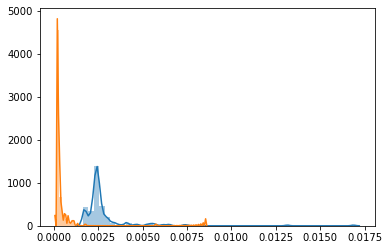

In [56]:
sns.distplot(pre_filtering_mer, label="pre")
sns.distplot(post_filtering_mer, label="post")

In [57]:
pre_des = pd.Series(pre_filtering_mer).describe()
pre_des

count    220.000000
mean       0.002808
std        0.001552
min        0.001648
25%        0.002269
50%        0.002441
75%        0.002678
max        0.016869
dtype: float64

In [58]:
post_des = pd.Series(post_filtering_mer).describe()
post_des

count    220.000000
mean       0.000372
std        0.000699
min        0.000160
25%        0.000206
50%        0.000227
75%        0.000318
max        0.008527
dtype: float64

In [77]:
p2_des = pd.Series(phase2_filtering_mer).describe()
p2_des * 100

count    22000.000000
mean         0.043289
std          0.086044
min          0.015835
25%          0.024031
50%          0.028747
75%          0.034838
max          1.038744
dtype: float64

In [78]:
gamb_colu_mask.mean().compute()

0.6997034339748361

In [80]:
phase2_mask.mean().compute()

0.6246213815325142

In [59]:
## Make table
out_df = pd.concat([pre_des, post_des], axis=1, keys=["pre-filtering", "post-filtering"])

# drop std because non-normal
out_df = out_df.T.drop(["std"], axis=1)

In [60]:
out_df["fraction_accessible"] = (1.0, gamb_colu_mask.mean().compute())

In [63]:
out_df.to_csv("../content/tables/mer_X.csv", float_format="%.5f")

In [64]:
fold = np.log2(post_filtering_mer) - np.log2(pre_filtering_mer)
pd.Series(fold).describe()

count    220.000000
mean      -3.229157
std        0.401916
min       -3.685262
25%       -3.478854
50%       -3.330376
75%       -3.150499
max       -0.624572
dtype: float64

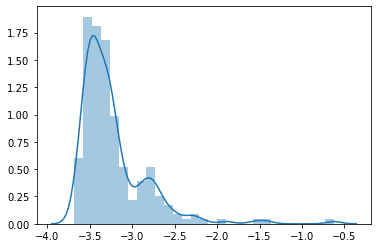

In [65]:
sns.distplot(fold)

In [67]:
out_df * 100

count      mean       min       25%       50%       75%  \
pre-filtering   22000.0  0.280755  0.164819  0.226939  0.244119  0.267769   
post-filtering  22000.0  0.037246  0.015978  0.020602  0.022732  0.031796   

                     max  fraction_accessible  
pre-filtering   1.686927           100.000000  
post-filtering  0.852733            69.970343